##**1. Import Library**

In [86]:
# Install Library
!pip install vaderSentiment

* Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
* NLTK is a leading platform for building Python programs to work with human language data.

In [87]:
# Import Library
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

##**2. Import Data**

In [88]:
# Import Data from Github
url = 'https://raw.githubusercontent.com/aridepriansyah/tugaspythonubd/master/dataset/tokopediacare.csv'
df = pd.read_csv(url, sep=',',)

In [89]:
# Import Data from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
df.head(5)

,timestamp,text
0,11/15/2020 10:52,RT @TokopediaCare: Ini hal lain yang berhasil ...
1,11/15/2020 10:51,RT @TokopediaCare: Ini hal lain yang berhasil ...
2,11/15/2020 10:44,@TokopediaCare Barangnya kan sudah diterima pe...
3,11/15/2020 10:29,@TokopediaCare Sudah masuk belum email dari saya?
4,11/15/2020 10:28,@TokopediaCare cek dm min


In [91]:
df.shape

(500, 2)

#**3. PreProcessing**

###a. Remove Duplicate

In [92]:
# Remove Duplicate Row from Table
df = df.drop_duplicates()
df.shape

(498, 2)

###b. RemoveURL

In [93]:
# Remove Duplicate from Selected Column
df['text'] = df['text'].str.replace('http\S+|www.\S+', '', case=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


###c. LowerCasing

In [94]:
# Merubah keseluruhan kalimat di kolom yang dipilih menjadi huruf kecil
df['text'] = df['text'].str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [95]:
df.text

0      rt @tokopediacare: ini hal lain yang berhasil ...
1      rt @tokopediacare: ini hal lain yang berhasil ...
2      @tokopediacare barangnya kan sudah diterima pe...
3      @tokopediacare sudah masuk belum email dari saya?
4                              @tokopediacare cek dm min
                             ...                        
495    @dewe @tokopediacare iya sebelumnya aman makan...
496    @tokopediacare selamat hari ayah.\nwalapun aku...
497    @tokopediacare selamat hari ayah.\nwalapun aku...
498    @tokopediacare selamat hari ayah.\nwalapun aku...
499    rt @tokopediacare: kabar baik ini harus kamu s...
Name: text, Length: 498, dtype: object

###d. RemoveUsername (Optional)

In [96]:
# Menghilangkan kata yang diawali oleh simbol @ pada kolom tertentu
df['text'] = df['text'].str.replace('@[^\s]+','', case=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


###e. Tokenize (Optional)

In [97]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [98]:
#Testing
example_text = df.iloc[0]
print(nltk.word_tokenize(example_text['text']))

['rt', 'ini', 'hal', 'lain', 'yang', 'berhasil', 'mimin', 'menangin', 'selain', 'menangin', 'hati', 'kamu', 'nih', 'toppers', '!', '❤', 'boleh', 'lho', 'kalau', 'ada', 'yang', 'maunsend', 'vi…']


In [99]:
def identify_tokens(row):
    text = row['text']
    tokens = nltk.word_tokenize(text)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

df['text'] = df.apply(identify_tokens, axis=1)

In [100]:
df.text

0      [rt, ini, hal, lain, yang, berhasil, mimin, me...
1      [rt, ini, hal, lain, yang, berhasil, mimin, me...
2      [barangnya, kan, sudah, diterima, penjual, apa...
3               [sudah, masuk, belum, email, dari, saya]
4                                         [cek, dm, min]
                             ...                        
495    [iya, sebelumnya, aman, makanya, kemarin, aja,...
496    [selamat, hari, ayah, walapun, aku, gak, sedek...
497    [selamat, hari, ayah, walapun, aku, gak, sedek...
498    [selamat, hari, ayah, walapun, aku, gak, sedek...
499    [rt, kabar, baik, ini, harus, kamu, sebarin, t...
Name: text, Length: 498, dtype: object

###f. Stemming (Optional)

In [101]:
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [102]:
my_list = ['frightening', 'frightened', 'frightens']
print ([stemming.stem(word) for word in my_list])

['frighten', 'frighten', 'frighten']


In [103]:
def stem_list(row):
    my_list = row['text']
    stemmed_list = [stemming.stem(word) for word in my_list]
    return (stemmed_list)

df['stemmed_words'] = df.apply(stem_list, axis=1)

In [104]:
df.text

0      [rt, ini, hal, lain, yang, berhasil, mimin, me...
1      [rt, ini, hal, lain, yang, berhasil, mimin, me...
2      [barangnya, kan, sudah, diterima, penjual, apa...
3               [sudah, masuk, belum, email, dari, saya]
4                                         [cek, dm, min]
                             ...                        
495    [iya, sebelumnya, aman, makanya, kemarin, aja,...
496    [selamat, hari, ayah, walapun, aku, gak, sedek...
497    [selamat, hari, ayah, walapun, aku, gak, sedek...
498    [selamat, hari, ayah, walapun, aku, gak, sedek...
499    [rt, kabar, baik, ini, harus, kamu, sebarin, t...
Name: text, Length: 498, dtype: object

###g. Stopwords (Optional)

In [105]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [106]:
def remove_stops(row):
    text = row['text']
    meaningful_words = [w for w in text if not w in stops]
    return (meaningful_words)

df['text'] = df.apply(remove_stops, axis=1)

In [107]:
#Joining Text
df['text'] = df['text'].str.join(" ")

In [108]:
print(df['text'][0])

rt ini hal lain yang berhasil mimin menangin selain menangin hati kamu nih toppers boleh lho kalau ada yang maunsend


###h. Special Character (Optional)

In [109]:
import string

printable = set(string.printable)

def remove_spec_chars(in_str):
    return ''.join([c for c in in_str if c in printable])

#**4. Sentiment Analysis**

In [110]:
#Change Title to String
df['text'] = df['text'].astype(str)

In [111]:
# Import library for Text Analytics
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [112]:
# Sentiment Analysis
sid = SentimentIntensityAnalyzer()
listy = [] 
for index, row in df.iterrows():
  df['text']
  ss = sid.polarity_scores(row['text'])
  listy.append(ss)
  
se = pd.Series(listy)
df['polarity'] = se.values
display(df.head(10))

,timestamp,text,stemmed_words,polarity
0,11/15/2020 10:52,rt ini hal lain yang berhasil mimin menangin s...,"[rt, ini, hal, lain, yang, berhasil, mimin, me...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,11/15/2020 10:51,rt ini hal lain yang berhasil mimin menangin s...,"[rt, ini, hal, lain, yang, berhasil, mimin, me...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,11/15/2020 10:44,barangnya kan sudah diterima penjual apa saya ...,"[barangnya, kan, sudah, diterima, penjual, apa...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,11/15/2020 10:29,sudah masuk belum email dari saya,"[sudah, masuk, belum, email, dari, saya]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,11/15/2020 10:28,cek dm min,"[cek, dm, min]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
5,11/15/2020 10:22,minta tolong resi sudah hari stuck,"[minta, tolong, resi, sudah, hari, stuck]","{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp..."
6,11/15/2020 10:13,min bbrp hari lalu saya beli barang udh bayar ...,"[min, bbrp, hari, lalu, saya, beli, barang, ud...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
7,11/15/2020 10:13,uda min barusan aku ikut kuis nya hehe bismila...,"[uda, min, barusan, aku, ikut, kui, nya, hehe,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
8,11/15/2020 10:04,sudah min bukti screenshotnya ada di dm yaa,"[sudah, min, bukti, screenshotnya, ada, di, dm...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
9,11/15/2020 10:02,saya udah jelasin lengkap dengamn screenshot f...,"[saya, udah, jelasin, lengkap, dengamn, screen...","{'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'comp..."


###a. Visualization

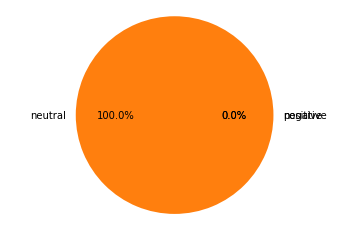

In [113]:
# Pie Chart
import matplotlib.pyplot as plt
labels = ['negative', 'neutral', 'positive']
sizes  = [ss['neg'], ss['neu'], ss['pos']]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal') 
plt.show()

###b. Save to CSV

In [114]:
df.to_csv('Output_File.csv', index=False)